11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/50
188/188 [==============================] - 10s 47ms/step - loss: 0.0580 - val_loss: 0.0218
Epoch 2/50
188/188 [==============================] - 8s 45ms/step - loss: 0.0196 - val_loss: 0.0160
Epoch 3/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0152 - val_loss: 0.0135
Epoch 4/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0130 - val_loss: 0.0121
Epoch 5/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0119 - val_loss: 0.0114
Epoch 6/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 7/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 8/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 9/50
188/188 [==============================] - 8s 44ms/step - loss: 0.0097 - val_loss: 0.0098
Epoch 10/50
188/188 [====

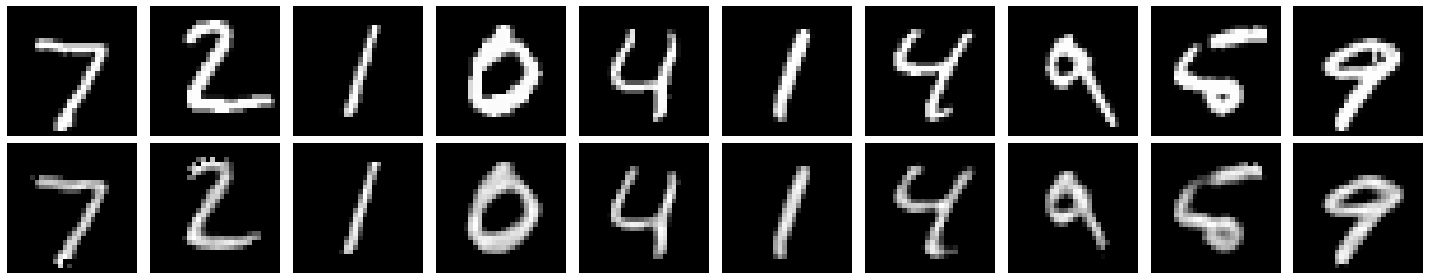

Epoch 1/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5896 - accuracy: 0.8276 - val_loss: 0.2003 - val_accuracy: 0.9393
Epoch 2/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1936 - accuracy: 0.9441 - val_loss: 0.1571 - val_accuracy: 0.9512
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1364 - accuracy: 0.9610 - val_loss: 0.1189 - val_accuracy: 0.9638
Epoch 4/30
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1076 - accuracy: 0.9689 - val_loss: 0.1018 - val_accuracy: 0.9684
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0888 - accuracy: 0.9741 - val_loss: 0.0872 - val_accuracy: 0.9730
Epoch 6/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0772 - accuracy: 0.9781 - val_loss: 0.0848 - val_accuracy: 0.9748
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.0802 - val_a

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
 
import numpy as np
import matplotlib.pyplot as plt
#Notice that we’re not loading any of the labels because autoencoders are unsupervised
(X_train, _), (X_test, _) = mnist.load_data()
# rescale our images from 0 – 255 to 0 – 1 and flatten them out.
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train.shape

X_test.shape
INPUT_SIZE = 784
ENCODING_SIZE = 64

#reduce our input from 784 -> 512 -> 256 -> 128 -> 64 (encoder path), then expand it back up 64 -> 128 -> 256 -> 512 -> 784(decoder path).
# Also notice the relu activation function
input_img = Input(shape=(INPUT_SIZE,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(ENCODING_SIZE, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(INPUT_SIZE, activation='relu')(decoded)

autoencoder = Model(input_img, decoded)

#using ADAM optimizer and mean squared error loss (the Euclidean distance/loss) between the input and reconstruction
autoencoder.compile(optimizer='adam', loss='mean_squared_error',)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

#After our autoencoder has trained, we can try to encode and decode the test set to see how well our autoencoder can compress
decoded_imgs = autoencoder.predict(X_test)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=30,
  validation_data=(test_images, to_categorical(test_labels)),
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])


# Print our model's predictions.
print("These are the model predictions :")
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
print("\n")

# Check our predictions against the ground truths.
print("These are the corresponding labels :")
print(test_labels[:5]) # [7, 2, 1, 0, 4]

170500096/170498071 [==============================] - 3s 0us/step


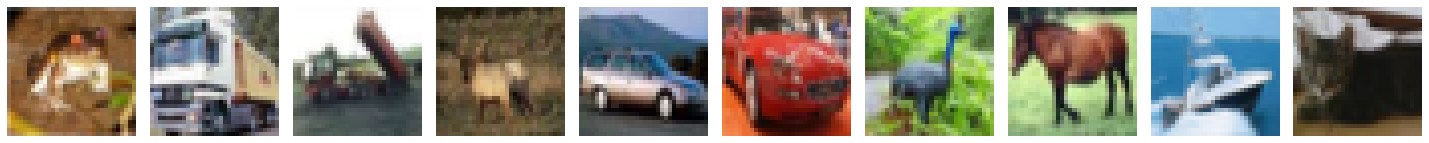

Epoch 1/30
   3/1563 [..............................] - ETA: 43s - loss: 2.3338 - accuracy: 0.0677 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1563/1563 [==============================] - 52s 33ms/step - loss: 1.7511 - accuracy: 0.3844 - val_loss: 1.4554 - val_accuracy: 0.4970
Epoch 2/30
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4192 - accuracy: 0.5088 - val_loss: 1.3785 - val_accuracy: 0.5206
Epoch 3/30
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3325 - accuracy: 0.5391 - val_loss: 1.3270 - val_accuracy: 0.5423
Epoch 4/30
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2767 - accuracy: 0.5605 - val_loss: 1.2968 - val_accuracy: 0.5401
Epoch 5/30
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2331 - accuracy: 0.5743 - val_loss: 1.2911 - val_accuracy: 0.5499
Epoch 6/30
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1960 - accuracy: 0.5866 - val_loss: 1.2627 - val_accuracy: 0.5585
Epoch 7/30
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1785 - accuracy: 0.5902 - val_loss: 1.2414 - val_accura

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

train_images.shape

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(32, 32, 3)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

tf.config.run_functions_eagerly(True)
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=30,
  validation_data=(test_images, to_categorical(test_labels)),
)

pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(32, filter_size, input_shape=(32, 32, 3)),
  Conv2D(32, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Dropout(.2),
  Conv2D(64, filter_size),
  Conv2D(64, filter_size),
  Dropout(.2),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  validation_data=(test_images, to_categorical(test_labels)),
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print("These are the model predictions :")
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
print("\n")

# Check our predictions against the ground truths.
print("These are the corresponding labels :")
print(test_labels[:5]) # [7, 2, 1, 0, 4]